# Building Random Forests

In this demo, will you will see how to train two gradient boosted decision trees and compare their performances. 


**<font color='red'>Note: Some of the code cells in this notebook may take a while to run.</font>**

### Import Packages

Before you get started, import a few packages. Run the code cell below. 

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

We will also import the scikit-learn `RandomForestClassifier`, the `train_test_split()` function for splitting the data into training and test sets, and the functions `roc_curve` and `auc` to evaluate the model. 

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

## Step 1: Build Your DataFrame and Define Your ML Problem

We will work with the "cell2celltrain" data set. This data set is already preprocessed, with the proper formatting, outliers, and missing values taken care of, and all numerical columns scaled to the [0, 1] interval. One-hot encoding has been performed on all categorical columns. Run the cell below to load the data set and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data_RF", "cell2celltrain.csv")
df = pd.read_csv(filename, header=0)

#### Define the Label

This is a binary classification problem in which we will predict customer churn. The label is the `Churn` column.

#### Identify Features

Our features will be all of the remaining columns in the dataset.

## Step 2: Create Labeled Examples from the Data Set 


In [4]:
y = df['Churn'] 
X = df.drop(columns = 'Churn', axis=1)

## Step 3: Create Training and Test Data Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

## Step 4: Train Two Random Forest Classifiers

<p>The random forest (RF) algorithm is probably the most well known and utilized implementation of the bagging technique. A RF is an ensemble of decision trees, where both bagging and random feature selection are used to reduce the variance of the forest.
    
We will use the scikit-learn's `RandomForestClassifier`. Please refer to the online [documentation](http://scikit-learn.org/stable/modules/ensemble.html) for a brief overview of scikit-learn's ensemble methods.

We will not perform any special hyperparameter optimization, but will instead compare two Random Forest models that differ only in the number of estimators (decision trees).

In the code cell below, build and train two random forest models, one with 20 estimators and one with 100 estimators. 

In [6]:
print('Begin Random Forest Implementation...')
# 1. Create the RandomForestClassifier model object below and assign to variable 'rf_20_model'
rf_20_model = RandomForestClassifier(criterion='entropy', n_estimators=20)

# 2. Fit the model to the training data below
rf_20_model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the 
# result to a list named 'rf_20_predictions' 
rf_20_preds = rf_20_model.predict_proba(X_test)
rf_20_predictions = list(rf_20_preds[:, -1])

# 4. Create the RandomForestClassifier model object below and assign to variable 
# 'rf_100_model'
rf_100_model = RandomForestClassifier(criterion='entropy', n_estimators=100)

# 5. Fit the model to the training data 
rf_100_model.fit(X_train, y_train)

# 6. Make predictions on the test data using the predict_proba() method and 
# assign the result to a list named 'rf_100_predictions' 
rf_100_preds = rf_100_model.predict_proba(X_test)
rf_100_predictions = list(rf_100_preds[:, -1])

print('End')

Begin Random Forest Implementation...
End


## Step 5: Evaluate the Performance Using ROC and AUC

We will now plot two ROC curves for the two RF classifiers on the same graph. 

In [7]:
print('Computing ROC Curve...')

# Use roc_curve to record fpr and tpr for rf_20_model
fpr_20, tpr_20, thresholds_20 = roc_curve(y_test, rf_20_predictions)

# Use roc_curve to record fpr and tpr for rf_100_model
fpr_100, tpr_100, thresholds_100 = roc_curve(y_test, rf_100_predictions)

print('End')

Computing ROC Curve...
End


The code cell below plots the ROC curves for both models. Run the code cell and inspect the results.

Plotting ROC Curve...


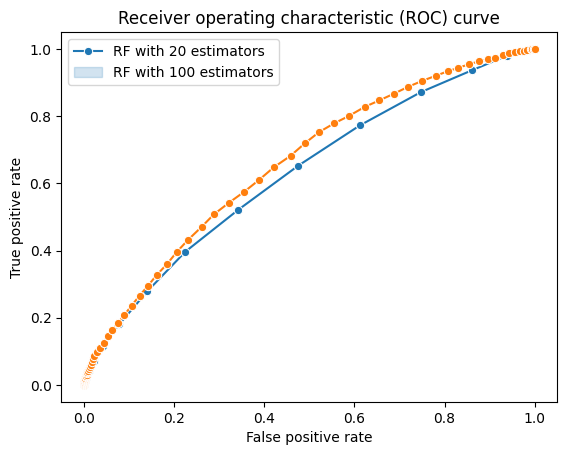

In [8]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_20, y=tpr_20, marker = 'o')
sns.lineplot(x=fpr_100, y=tpr_100, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()


You should see that with the random forest model that was fit using a larger number of estimators performs better. Let's quantify this difference in performance using AUC. The code cell below uses the `auc()` function to compute the areas under each of the receiver operating characteristic (ROC) curves. 

In [9]:
# AUC for rf_20_model
auc_20 = auc(fpr_20, tpr_20)
print("AUC of the RF model with 20 estimators is {:.3f}".format(auc_20))

# AUC for rf_100_model
auc_100 = auc(fpr_100, tpr_100)
print("AUC of the RF model with 100 estimators is {:.3f}".format(auc_100))


AUC of the RF model with 20 estimators is 0.629
AUC of the RF model with 100 estimators is 0.660
